In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
sys.path = list(np.insert(sys.path, 0, "../../../pyvista"))


#sys.path("../../../pyvista")

import pyvista

In [2]:
pyvista.__path__

['../../../pyvista/pyvista']

In [3]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = path_to_data + "model5_orientations.csv",
                        path_i = path_to_data + "model5_surface_points.csv") 

Active grids: ['regular']


In [4]:
gp.map_series_to_surfaces(geo_data, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')})
geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False
Basement,False,False


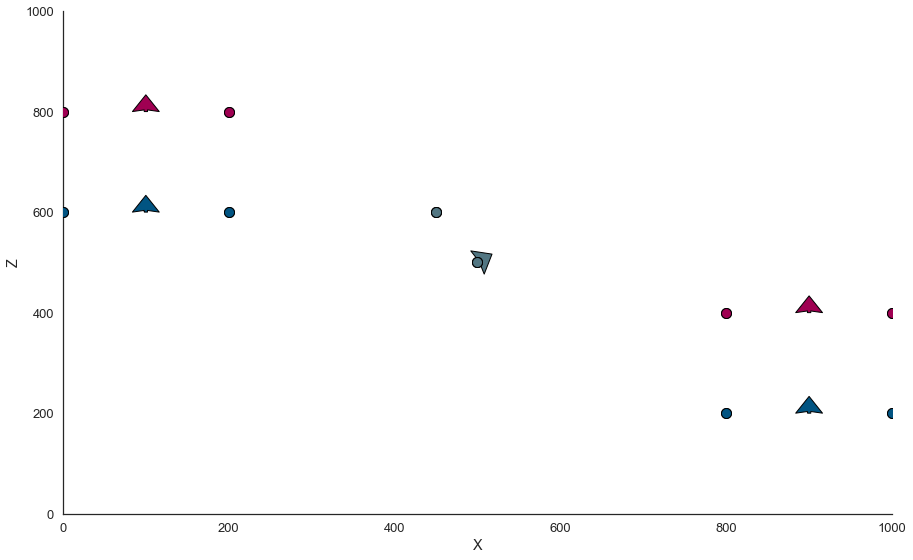

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

In [6]:
geo_data.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
4,500,500,500,0.5001,0.5001,0.5001,8.660254e-01,1.000053e-12,0.5,60,90,1,fault,Fault_Series,1,1,0.01
1,100,500,600,0.3001,0.5001,0.5501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,2,2,0.01
3,900,500,200,0.7001,0.5001,0.3501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,2,2,0.01
0,100,500,800,0.3001,0.5001,0.6501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,3,2,0.01
2,900,500,400,0.7001,0.5001,0.4501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,3,2,0.01


In [7]:
geo_data.surfaces

,surface,series,order_surfaces,isBasement,color,id
2,fault,Fault_Series,1,False,#527682,1
0,rock1,Strat_Series,1,False,#015482,2
1,rock2,Strat_Series,2,False,#9f0052,3
3,basement,Basement,1,True,#728f02,4


In [8]:
geo_data.orientations.sort_table()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
4,500,500,500,0.5001,0.5001,0.5001,8.660254e-01,1.000053e-12,0.5,60,90,1,fault,Fault_Series,1,1,0.01
1,100,500,600,0.3001,0.5001,0.5501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,2,2,0.01
3,900,500,200,0.7001,0.5001,0.3501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,2,2,0.01
0,100,500,800,0.3001,0.5001,0.6501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,3,2,0.01
2,900,500,400,0.7001,0.5001,0.4501,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,3,2,0.01


In [9]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!


In [10]:
sol = gp.compute_model(geo_data)

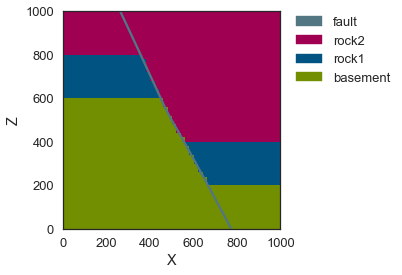

In [11]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='y', show_data=False, show_all_data=True)

## Pyvista

In [12]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [13]:
gv = vista.Vista(geo_data, notebook=True)
gv.create_structured_grid()
gv.set_structured_grid_data()
#gv.p.add_mesh(gv.vista_rgrid)

When a sclar valur is added after passing the mesh to the plotter, the plotter does not display it. If you set the scalar before it does. Why?

In [14]:
gv.p.mesh is gv.vista_rgrid

True

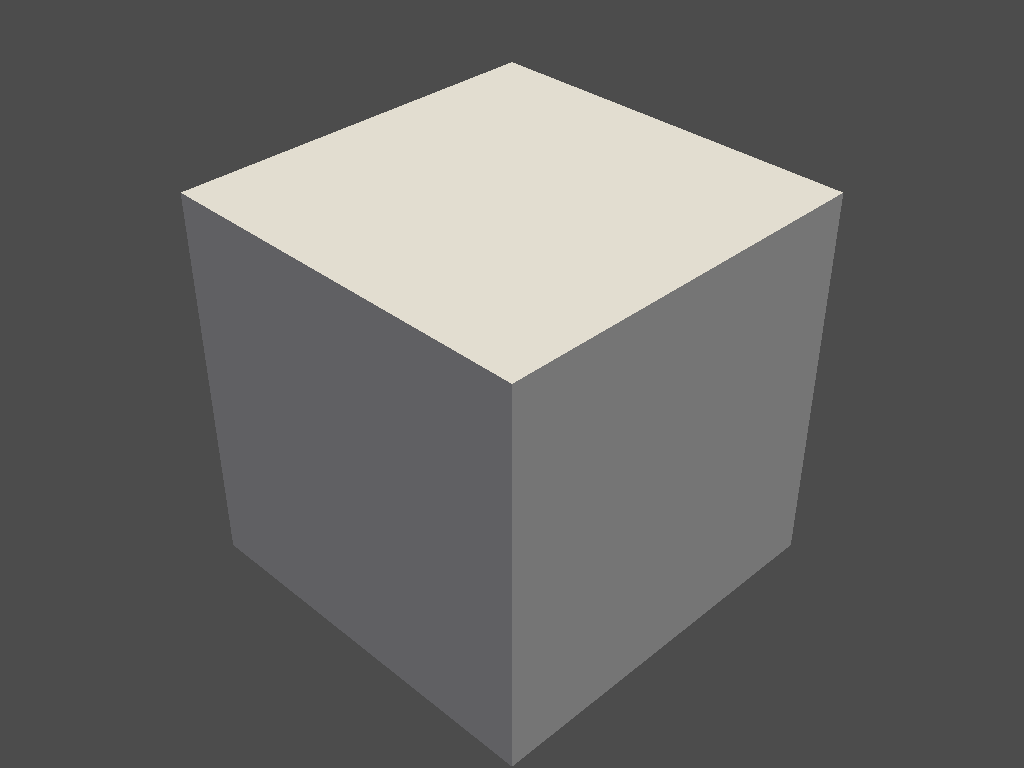

In [15]:
gv.p.show(interactive_update=True)

In [16]:
gv.vista_rgrid.active_scalar_name

'lith'

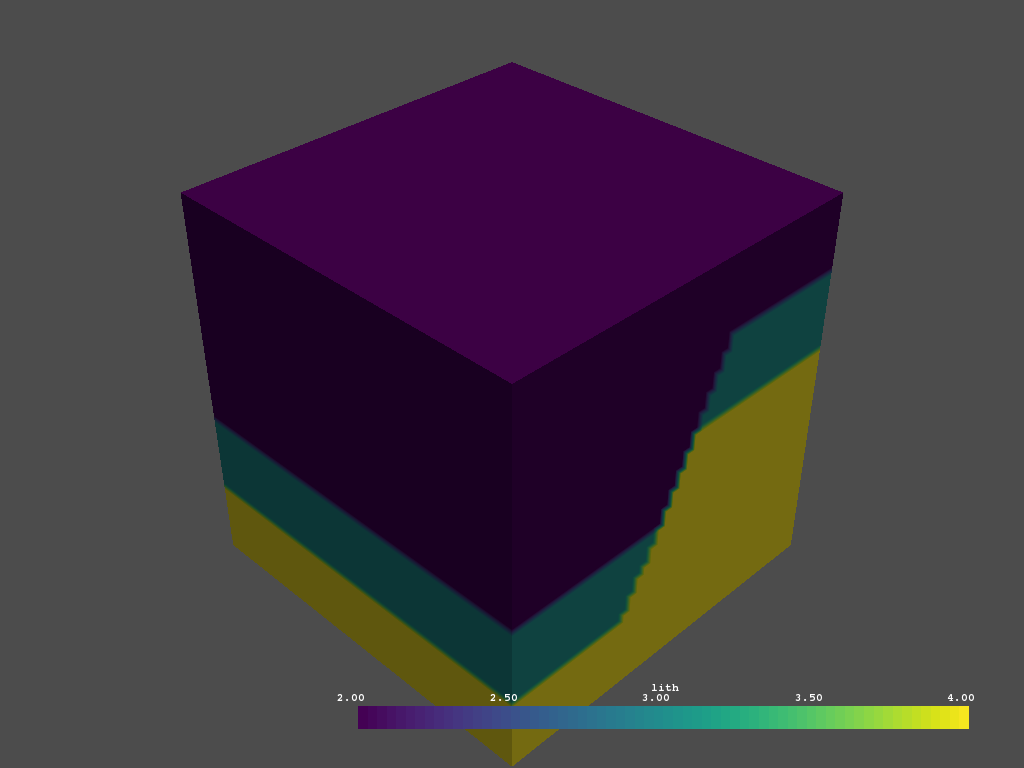

In [17]:
gv.vista_rgrid.plot()

Is there a way to recover the renderer?

In [18]:
gv.p.show()

AttributeError: 'Plotter' object has no attribute 'ren_win'

### Surfaces:

In [19]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [20]:
gv = vista.Vista(geo_data)

In [21]:
gv.set_surfaces()
gv.p.show_grid()


Is there a way to plot the grid with panel?

In [22]:
gv.p.show(use_panel=True)

VTK(vtkCocoaRenderWindow, height=400, sizing_mode='stretch_width')

### Data

In [23]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [24]:
gv = vista.Vista(geo_data, notebook=False)
gv.set_surface_points()
gv.set_orientations()


,val
4,vtkPlaneWidget (0x7fec15e76b70)\n Debug: Off\...
0,vtkPlaneWidget (0x7fec15f1f050)\n Debug: Off\...
2,vtkPlaneWidget (0x7fec15f4f730)\n Debug: Off\...
1,vtkPlaneWidget (0x7fec15f813e0)\n Debug: Off\...
3,vtkPlaneWidget (0x7fec15fb2c10)\n Debug: Off\...


In [25]:
gv.p.show()

[(2055.069894609004, 2055.0698707671463, 2055.06989365533),
 (500.00000858306885, 499.99998474121094, 500.00000762939453),
 (0.0, 0.0, 1.0)]

### Data and surfaces

In [26]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [27]:
gv = vista.Vista(geo_data, notebook=False)
gv.set_surface_points()
gv.set_orientations()
gv.set_surfaces()
gv.p.show_grid()


In [28]:
gv.surf_polydata

,val
2,PolyData (0x7fecceb5f0a8)\n N Cells:\t7292\n ...
1,PolyData (0x7fecceb5f1c8)\n N Cells:\t6770\n ...
0,PolyData (0x7fecceb5f288)\n N Cells:\t6778\n ...


In [29]:
geo_data.surfaces

,surface,series,order_surfaces,isBasement,color,id
2,fault,Fault_Series,1,False,#527682,1
1,rock2,Strat_Series,1,False,#9f0052,2
0,rock1,Strat_Series,2,False,#015482,3
3,basement,Basement,1,True,#728f02,4


In [30]:
gv.p.show()

[(3310.0456390541044, 3300.0456304710356, 3300.0456304710356),
 (500.00000858306885, 490.0, 490.0),
 (0.0, 0.0, 1.0)]

### Interaction

In [63]:
from gempy.plot import vista
from importlib import reload
reload(vista)

<module 'gempy.plot.vista' from '../../gempy/plot/vista.py'>

In [64]:
gv = vista.Vista(geo_data, notebook=False, real_time=True)
gv.set_surface_points()
gv.set_orientations()
gv.set_surfaces()
gv.p.show_grid()

In [65]:
gv.update_surfaces()

True

In [66]:
gv.p.show()

[(1191.766937158306, -2665.903298292382, 1316.5094536243405),
 (550.4193179569763, -141.7061648319234, 526.6297254918068),
 (-0.18908864019959493, 0.2491767907189189, 0.9498191475825744)]

In [33]:
gv.p.update?

In [ ]:
gv.real_time